In [ ]:
# Added code
!pip install pandas

In [ ]:
# Added code
import pandas as pd

In [ ]:
# Added code
main_df = pd.read_csv('/content/drive/My Drive/chernobyl.csv')

In [ ]:
# renaming columns and removing the ones that won't be used in the analysis
main_df.columns = ['country', 'country_code', 'locality', 'latitude', 'longitude', 'date', 'end_time', 'duration', 'iodine131', 'caesium134', 'caesium137']
main_df = main_df.drop(columns=['end_time', 'duration'])

In [ ]:
# checking main dataframe
main_df.head()

,country,country_code,locality,latitude,longitude,date,iodine131,caesium134,caesium137
0,SE,1,RISOE,12.07,55.7,86/04/27,1,0,0.24
1,SE,1,RISOE,12.07,55.7,86/04/28,0.0046,0.00054,0.00098
2,SE,1,RISOE,12.07,55.7,86/04/29,0.0147,0.0043,0.0074
3,SE,1,RISOE,12.07,55.7,86/04/29,0.00061,0,0.00009
4,SE,1,RISOE,12.07,55.7,86/04/30,0.00075,0.0001,0.00028


In [ ]:
# checking how many rows of data we have
print('There are {} rows of data in this dataset'.format(main_df.shape[0]))

There are 2051 rows of data in this dataset


In [ ]:
# replacing country abreviations with country names
main_df['country'].replace({'AU': 'Austria',
                       'BE': 'Belgium',
                       'CH': 'Switzerland',
                       'CZ': 'Czechoslovakia',
                       'DE': 'Germany',
                       'ES': 'Spain',
                       'F': 'France',
                       'FI': 'Finland',
                       'GR': 'Greece',
                       'HU': 'Hungary',
                       'IR': 'Ireland',
                       'IT': 'Italy',
                       'NL': 'Netherlands',
                       'NO': 'Norway',
                       'SE': 'Sweden',
                       'UK': 'United Kingdom'}, inplace=True)

<ipython-input-8-ac051a04f8ce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['country'].replace({'AU': 'Austria',


In [ ]:
# Added code
# main_df['country'] = main_df['country'].astype(str).str[:2].str.upper()

In [ ]:
# changing date column to datetime format
main_df['date']= pd.to_datetime(main_df['date'])

<ipython-input-11-a78225c65848>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  main_df['date']= pd.to_datetime(main_df['date'])


In [ ]:
# checking dtypes of columns
main_df.dtypes

,0
country,object
country_code,int64
locality,object
latitude,float64
longitude,float64
date,datetime64[ns]
iodine131,object
caesium134,object
caesium137,object


In [ ]:
# Added code
!pip install numpy

In [ ]:
# Added code
import numpy as np

In [ ]:
## Updated Code
# clearing Iodine 131, Caesium 134 and Caesium 137 columns from incorrect strings that make its dtype = object.
# removing strange '<' strings from columns.
main_df[['iodine131', 'caesium134', 'caesium137']] = main_df[['iodine131', 'caesium134', 'caesium137']].replace('<',np.nan)
# removing strange 'L' strings from columns.
main_df[['iodine131', 'caesium134', 'caesium137']] = main_df[['iodine131', 'caesium134', 'caesium137']].replace('L',np.nan)
# removing strange 'L' strings from columns.
main_df[['iodine131', 'caesium134', 'caesium137']] = main_df[['iodine131', 'caesium134', 'caesium137']].replace('L',np.nan)
# removing strange 'N' strings from columns.
main_df[['iodine131', 'caesium134', 'caesium137']] = main_df[['iodine131', 'caesium134', 'caesium137']].replace('N',np.nan)

In [ ]:
# transforming the columns dtype to numeric.
main_df[['iodine131', 'caesium134', 'caesium137']] = main_df[['iodine131', 'caesium134', 'caesium137']].apply(pd.to_numeric)

# checking dtypes after transformation
main_df[['iodine131', 'caesium134', 'caesium137']].dtypes

,0
iodine131,float64
caesium134,float64
caesium137,float64


In [ ]:
# renaming lat and long columns to fix swapped dataset
main_df = main_df.rename(columns={'latitude': 'longitude', 'longitude': 'latitude'})

In [ ]:
# swaping lat/long values that are misplaced
main_df[['longitude','latitude']] = main_df[['longitude','latitude']].where(main_df['latitude'] > main_df['longitude'], main_df[['latitude','longitude']].values)

In [ ]:
# checking df with the corrections
main_df

,country,country_code,locality,longitude,latitude,date,iodine131,caesium134,caesium137
0,Sweden,1,RISOE,12.07,55.7,1986-04-27,1.00000,0.00000,0.24000
1,Sweden,1,RISOE,12.07,55.7,1986-04-28,0.00460,0.00054,0.00098
2,Sweden,1,RISOE,12.07,55.7,1986-04-29,0.01470,0.00430,0.00740
3,Sweden,1,RISOE,12.07,55.7,1986-04-29,0.00061,0.00000,0.00009
4,Sweden,1,RISOE,12.07,55.7,1986-04-30,0.00075,0.00010,0.00028
...,...,...,...,...,...,...,...,...,...
2046,Hungary,24,BUDAPEST,19.10,47.5,1986-05-07,3.70000,0.58000,1.20000
2047,Hungary,24,BUDAPEST,19.10,47.5,1986-05-08,2.20000,0.33000,0.69000
2048,Hungary,24,BUDAPEST,19.10,47.5,1986-05-09,0.75000,0.14000,0.29000
2049,Hungary,24,BUDAPEST,19.10,47.5,1986-05-10,0.05400,0.00600,0.00900


In [ ]:
# checking NaN values in columns
is_NaN = main_df.isna().sum()
print(is_NaN)

country           0
country_code      0
locality          0
longitude         0
latitude          0
date              0
iodine131        42
caesium134      250
caesium137      545
dtype: int64


In [ ]:
# setting locality and data as our indexes
main_df.set_index(['locality', 'date'], inplace=True)

# creating a new df grouping by those columns and getting the mean values for the numerical columns
avgdates_df = main_df.groupby(['locality','date','country'],sort=False).mean()

In [ ]:
# checking NaN values in columns after mean
is_NaN_avg = avgdates_df.isna().sum()
print(is_NaN_avg)

country_code      0
longitude         0
latitude          0
iodine131        40
caesium134      138
caesium137      364
dtype: int64


In [ ]:
# interpolating NaN values
avgdates_int_df = avgdates_df.interpolate(method='linear', axis=0)

In [ ]:
# checking NaN values in columns after interpolation
is_NaN_avg = avgdates_int_df.isna().sum()
print(is_NaN_avg)

country_code    0
longitude       0
latitude        0
iodine131       0
caesium134      0
caesium137      0
dtype: int64


In [ ]:
# checking mean values for the averaged df
avgdates_df.mean()

,0
country_code,9.816832
longitude,9.584936
latitude,48.846869
iodine131,0.920432
caesium134,0.160638
caesium137,0.314575


In [ ]:
# checking mean values for the interpolated df
avgdates_int_df.mean()

,0
country_code,9.816832
longitude,9.584936
latitude,48.846869
iodine131,0.914805
caesium134,0.160527
caesium137,0.286417


In [ ]:
# we'll use this format as our main df for the analisys in this book.
df = avgdates_int_df
df

country_code  longitude  latitude  iodine131  \
locality date       country                                                 
RISOE    1986-04-27 Sweden            1.0      12.07      55.7   1.000000   
         1986-04-28 Sweden            1.0      12.07      55.7   0.004600   
         1986-04-29 Sweden            1.0      12.07      55.7   0.007655   
         1986-04-30 Sweden            1.0      12.07      55.7   0.000750   
         1986-05-01 Sweden            1.0      12.07      55.7   0.000530   
...                                   ...        ...       ...        ...   
BUDAPEST 1986-05-07 Hungary          24.0      19.10      47.5   3.700000   
         1986-05-08 Hungary          24.0      19.10      47.5   2.200000   
         1986-05-09 Hungary          24.0      19.10      47.5   0.750000   
         1986-05-10 Hungary          24.0      19.10      47.5   0.054000   
         1986-05-11 Hungary          24.0      19.10      47.5   0.051000   

                             caesium134  caesium137  
locality date       country                          
RISOE    1986-04-27 Sweden      0.00000    0.240000  
         1986-04-28 Sweden      0.00054    0.000980  
         1986-04-29 Sweden      0.00215    0.003745  
         1986-04-30 Sweden      0.00010    0.000280  
         1986-05-01 Sweden      0.00000    0.000200  
...                                 ...         ...  
BUDAPEST 1986-05-07 Hungary     0.58000    1.200000  
         1986-05-08 Hungary     0.33000    0.690000  
         1986-05-09 Hungary     0.14000    0.290000  
         1986-05-10 Hungary     0.00600    0.009000  
         1986-05-11 Hungary     0.00600    0.010000  

[1414 rows x 6 columns]

In [ ]:
# checking maximum reported values for each isotope
print('Maximum reported Activity Concentration values per isotope:')
print('I-131: {:.1f} Bq/m3;'.format(df['iodine131'].max()))
print('Cs-134: {:.1f} Bq/m3;'.format(df['caesium134'].max()))
print('Cs-137: {:.1f} Bq/m3.'.format(df['caesium137'].max()))

Maximum reported Activity Concentration values per isotope:
I-131: 44.0 Bq/m3;
Cs-134: 9.7 Bq/m3;
Cs-137: 11.1 Bq/m3.


In [ ]:
# checking the time frame of the dataset
check_df = df.reset_index(drop=False)
print('First measument date: {}.'.format(check_df ['date'].min().date()))
print('Last measurement date: {}.'.format(check_df ['date'].max().date()))
print('The dataset has {} days of measurements recorded.'.format((check_df ['date'].max() - check_df ['date'].min()).days))

First measument date: 1986-04-27.
Last measurement date: 1986-08-04.
The dataset has 99 days of measurements recorded.


In [ ]:
#creating new dataset to get only the isotopes columns.
merge_df = df[['iodine131', 'caesium134', 'caesium137']]
merge_df = merge_df.reset_index()
merge_df = merge_df.drop(columns=['locality', 'country', 'date'])
merge_df = merge_df.rename(columns={'iodine131': 'I-131', 'caesium134': 'Cs-134', 'caesium137': 'Cs-137'})

In [ ]:
# Added code
!pip install matplotlib

In [ ]:
#Added code
import matplotlib.pyplot as plt

In [ ]:
#Added code
! pip install seaborn
import seaborn as sns

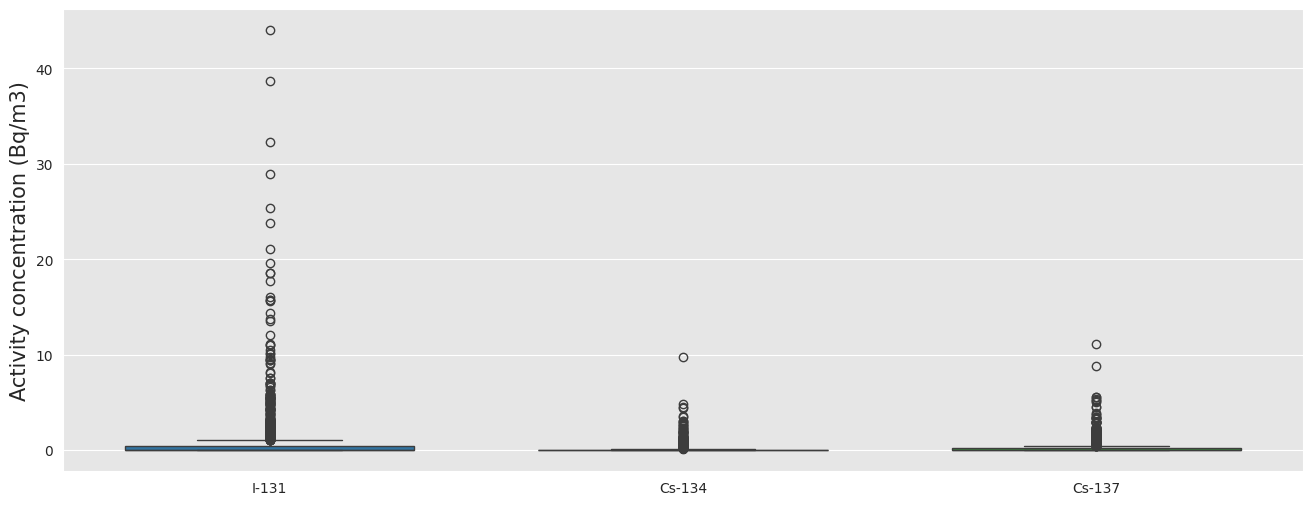

In [ ]:
# plotting a boxplot graph
plt.figure(figsize=(16,6))
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
xx1 = sns.boxplot(data=merge_df, width=.7, showfliers=True)
xx1.set_ylabel('Activity concentration (Bq/m3)',fontsize=15)
plt.show()

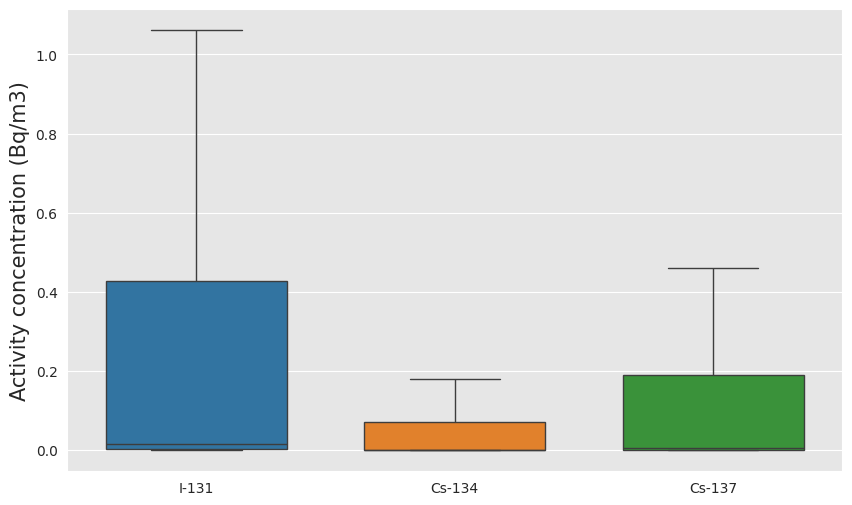

In [ ]:
# plotting a boxplot graph, hidding the flier values
plt.figure(figsize=(10,6))
xx1 = sns.boxplot(data=merge_df, width=.7, showfliers=False)
xx1.set_ylabel('Activity concentration (Bq/m3)',fontsize=15)
plt.show()

In [ ]:
# creating a new df to get only the dates and the sum of measurements reported on that date
dates_data = df.pivot_table(index = ['date'], aggfunc ='size')
dates_df = pd.DataFrame(data=dates_data)
dates_df = dates_df.rename(columns={0: 'measurements per day'})
dates_df = dates_df.reset_index()

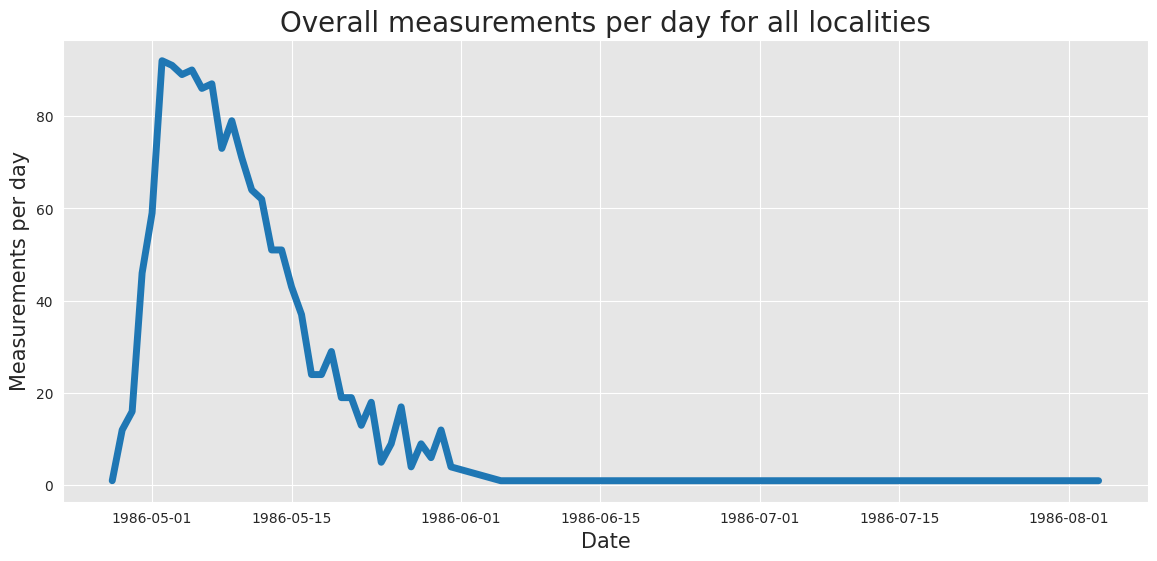

In [ ]:
# creating the lineplot graph
plt.figure(figsize=(14,6))
xx1 = sns.lineplot(x=(dates_df['date']),y = dates_df['measurements per day'], lw=5)
# creating a date array with the dates column of the df
xx1.axes.set_title('Overall measurements per day for all localities',fontsize=20)
xx1.set_xlabel('Date',fontsize=15);
xx1.set_ylabel('Measurements per day',fontsize=15);
plt.show()

In [ ]:
# creating new dataframe to evaluate a time frame of 60 days.
early_df = df.reset_index(level='date')
early_df = early_df[(early_df['date'] > '1986-04-01') & (early_df['date'] < '1986-06-01')]

# checking latest date of the new dataframe
early_df['date'].max()

Timestamp('1986-05-31 00:00:00')

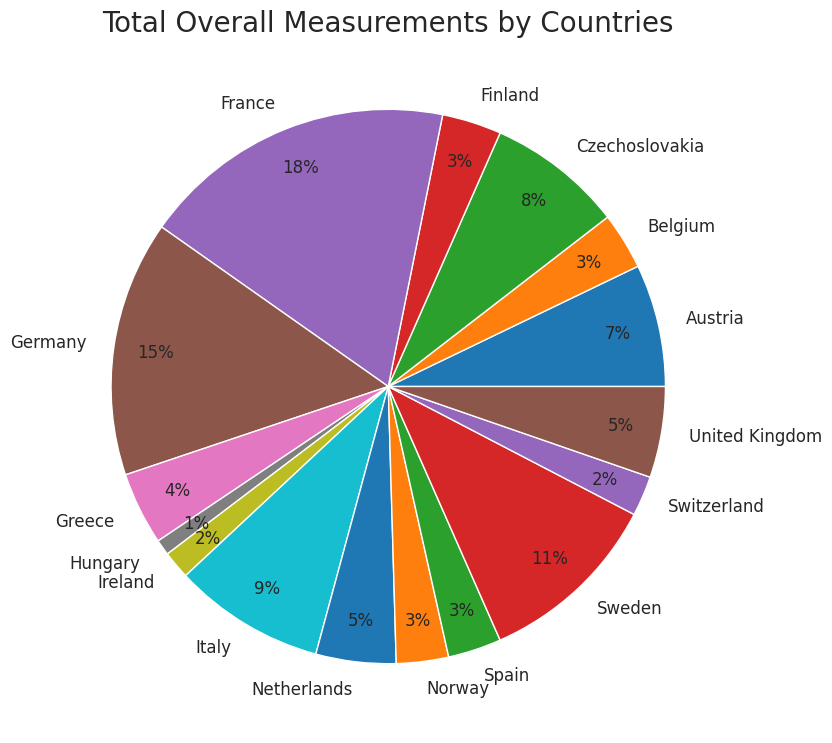

In [ ]:
# creating new dataframe with the countries and the sum of its reported measurements
country_measurements_df = df.pivot_table(index = ['country'], aggfunc ='size')
# creating pie chart
fig1 = plt.figure(figsize=(9,9))
ax1 = country_measurements_df.plot(kind='pie', startangle=0, legend=False, fontsize=12, autopct='%.0f%%', pctdistance=0.85, rotatelabels=False, label='')
plt.title('Total Overall Measurements by Countries', fontsize=20)
plt.show()
# saving piechart
fig1.savefig('piechart.png')

In [ ]:
# creating new dataframe to get only the countries and isotopes columns
per_country = early_df.reset_index()
per_country = per_country[['country', 'iodine131', 'caesium134', 'caesium137']]
per_country = per_country.groupby(['country']).sum()

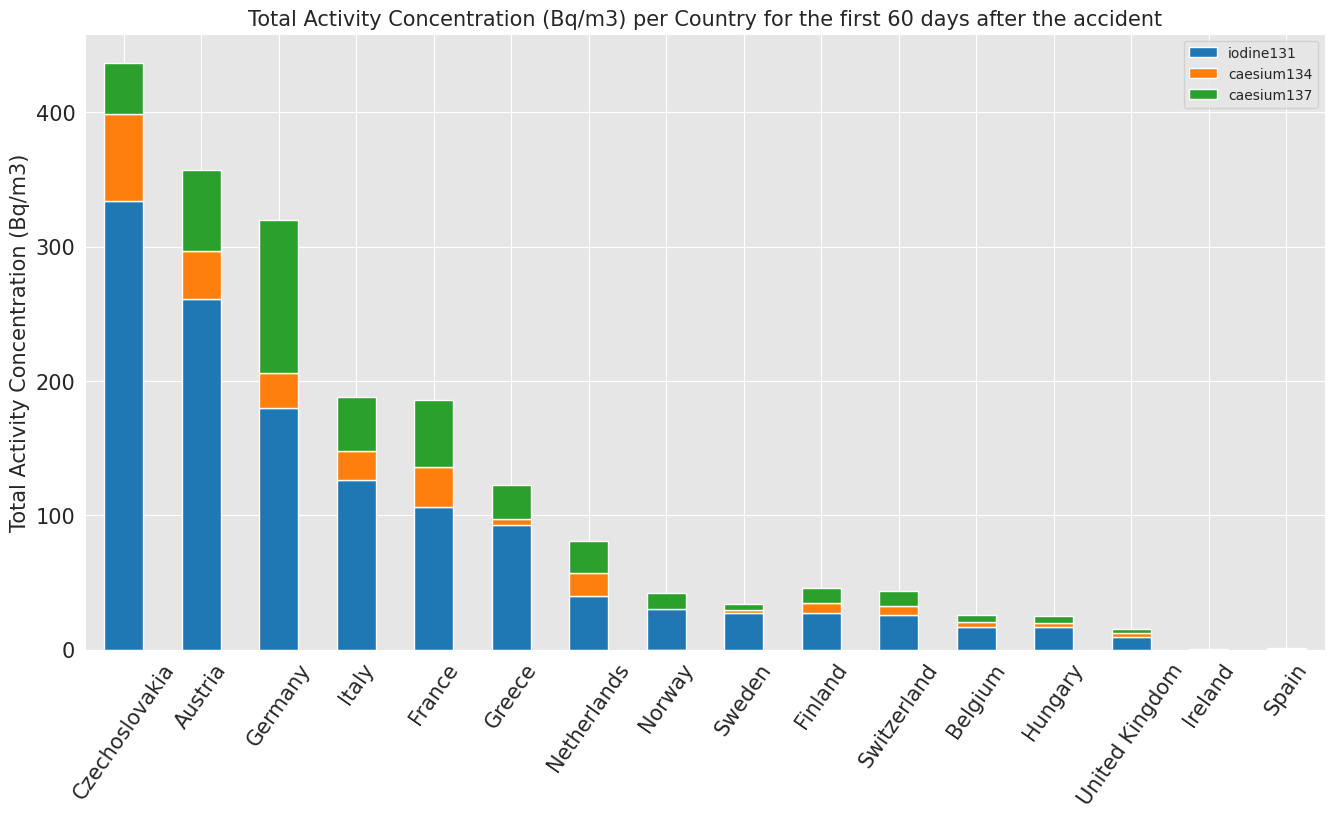

In [ ]:
# generating bar plot
ax1 = per_country.sort_values('iodine131', ascending=False).plot(kind='bar', subplots=False,
                 sharex=True, sharey=True, title=(''), xlabel='', ylabel='', use_index=True,
                 legend=True, fontsize=15, stacked=True, figsize=(16,8), rot=55)
plt.title('Total Activity Concentration (Bq/m3) per Country for the first 60 days after the accident', fontsize=15)
ax1.set_ylabel('Total Activity Concentration (Bq/m3)',fontsize=15)
plt.show()
# saving bar plot using pandas graph plotting
fig = ax1.get_figure()
fig.savefig('countries.png', bbox_inches='tight')

In [ ]:
# creating new dataframe to get only the localities and isotopes columns
per_locality = early_df.reset_index(drop=False)
per_locality = per_locality[['locality', 'iodine131', 'caesium134', 'caesium137']]
per_locality = per_locality.groupby('locality').sum()
per_locality = per_locality.sort_values('iodine131', ascending=False)

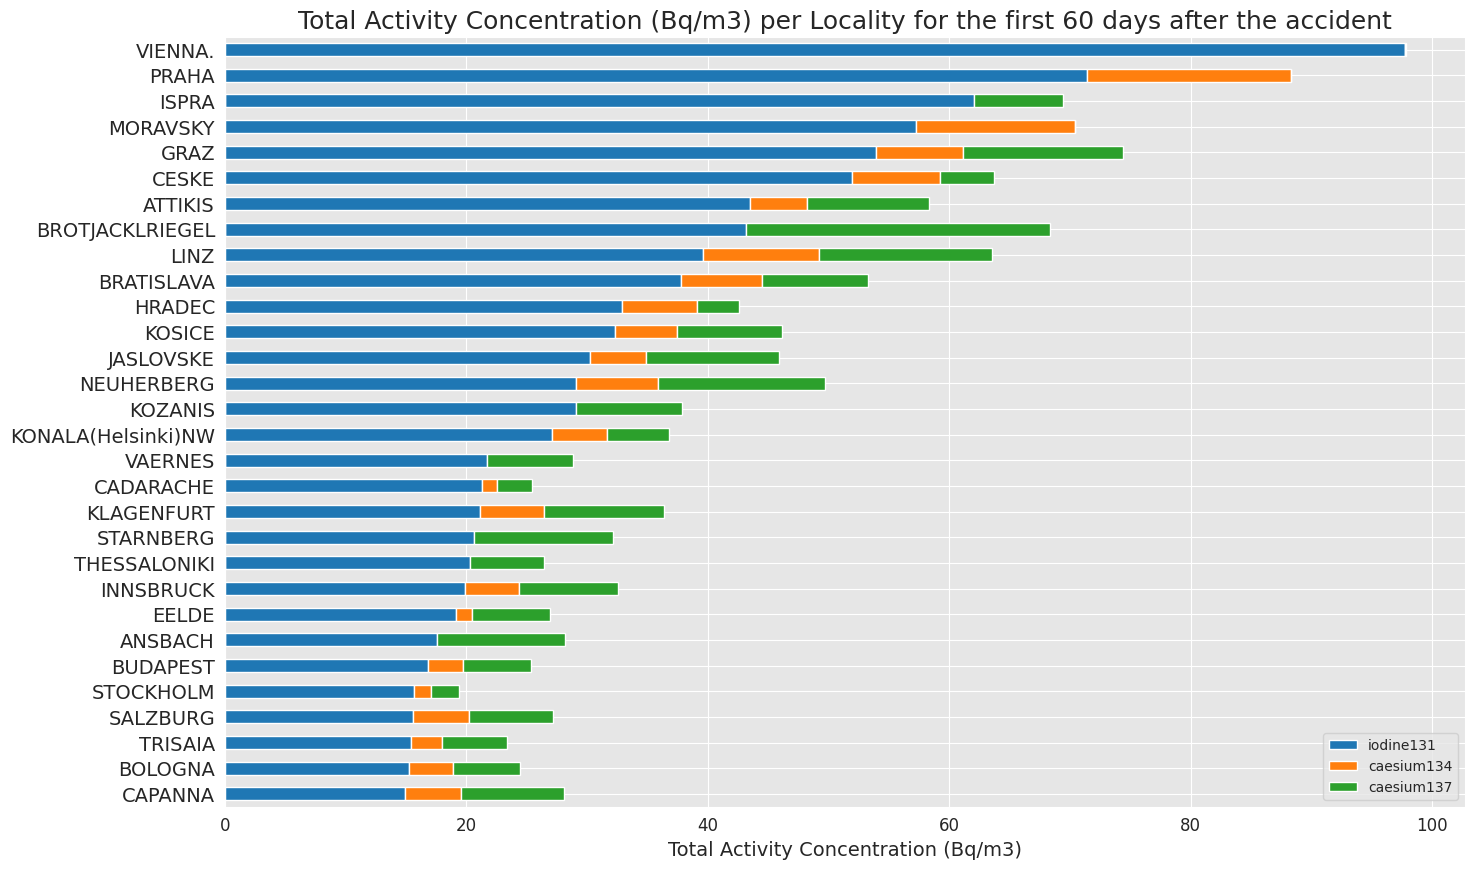

In [ ]:
# generating horizontal bar plot
ax1 = per_locality.sort_values('iodine131', ascending=True).iloc[65:95].plot(kind='barh',
                                 y=['iodine131', 'caesium134','caesium137'],
                                 stacked=True, subplots=False, layout=(3,1),
                                 figsize=(16,10),
                                 ylabel='',
                                 xlabel='',
                                 fontsize='12',
                                 title=('')
                                )
plt.yticks(fontsize=14)
plt.title('Total Activity Concentration (Bq/m3) per Locality for the first 60 days after the accident', fontsize=18)
ax1.set_xlabel('Total Activity Concentration (Bq/m3)',fontsize=14);
plt.show()
# saving bar plot using pandas graph plotting
fig = ax1.get_figure()
fig.savefig('localities.png', bbox_inches='tight')

In [ ]:
# creating divided dataframes to plot one graph for each isotope.
early_df = early_df.reset_index()
per_locality_i131 = early_df[['locality', 'iodine131']]
per_locality_i131 = per_locality_i131.groupby('locality').sum().sort_values('iodine131', ascending=False).iloc[0:20]
per_locality_cs134 = early_df[['locality', 'caesium134']]
per_locality_cs134 = per_locality_cs134.groupby('locality').sum().sort_values('caesium134', ascending=False).iloc[0:20]
per_locality_cs137 = early_df[['locality', 'caesium137']]
per_locality_cs137 = per_locality_cs137.groupby('locality').sum().sort_values('caesium137', ascending=False).iloc[0:20]

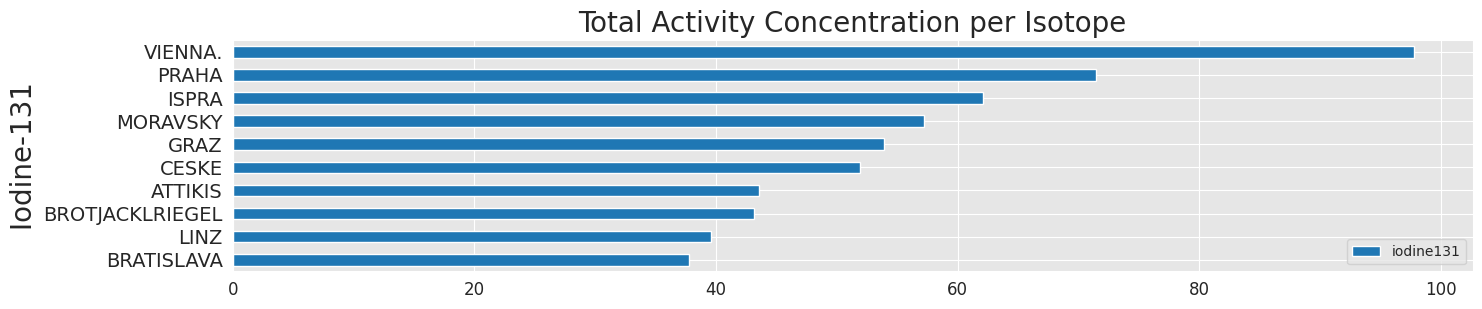

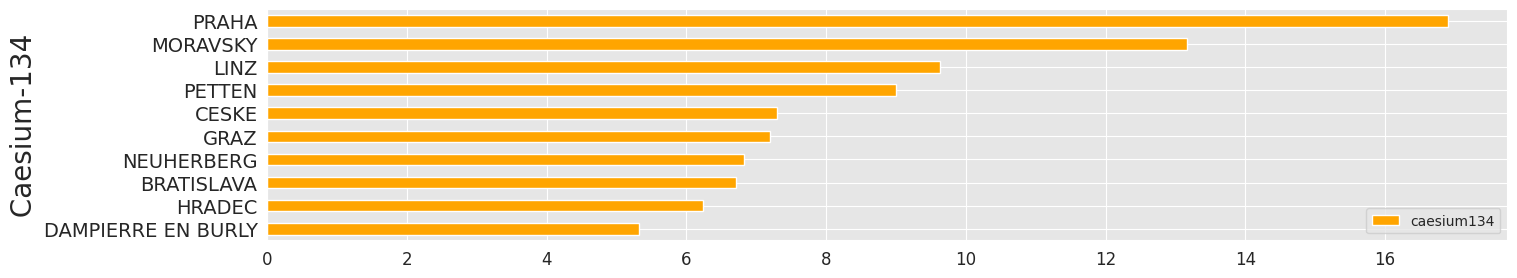

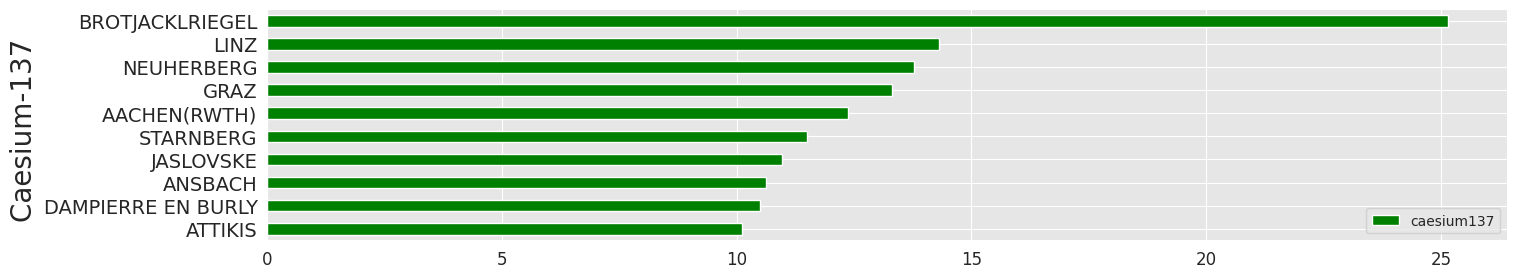

In [ ]:
# generating three individual horizontal bar plots to visualize the influence of each radioisotope
ax1 = per_locality_i131.iloc[0:10].sort_values('iodine131').plot(kind='barh', color=None, figsize=(16,3), fontsize='14')
ax1.set_title('Total Activity Concentration per Isotope',fontsize=20);
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel(' Iodine-131 ', fontsize='20')
ax2 = per_locality_cs134.iloc[0:10].sort_values('caesium134').plot(kind='barh', color='orange', figsize=(16,3), fontsize='14')
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel(' Caesium-134 ', fontsize='20')
ax3 = per_locality_cs137.iloc[0:10].sort_values('caesium137').plot(kind='barh', color='green', figsize=(16,3), fontsize='14')
plt.xticks(fontsize=12)
plt.xlabel('', fontsize='15')
plt.ylabel('Caesium-137 ', fontsize='20')
plt.show()

In [ ]:
coord_df = df.reset_index(drop=False)
coord_df = coord_df[['country','locality','latitude','longitude']]
# fixing very wrong coordinate values for VALENCIA and VAERNES (reported values were zeros).
# coord_df[coord_df['locality'] == 'VALENCIA']
## Updated part
coord_df.at[84, 'latitude'] = 39.5
coord_df.at[84, 'longitude'] = -0.4
coord_df.at[85, 'latitude'] = 63.5
coord_df.at[85, 'longitude'] = 10.9

In [ ]:
# Added code
coord_df['latitude'] = pd.to_numeric(coord_df['latitude'], errors='coerce')
coord_df['longitude'] = pd.to_numeric(coord_df['longitude'], errors='coerce')

In [ ]:
# Added and Updated
coord_df = coord_df.reset_index()  # brings 'locality' back as a column
coord_df = coord_df.set_index('locality')  # now this will work

In [ ]:
# Added code
from geopy.distance import distance

In [ ]:
## Updated code

# Chernobyl coordinates
cherno_coord = (51.4, 30.1)

# Make sure latitude and longitude are floats
coord_df['latitude'] = coord_df['latitude'].astype(float)
coord_df['longitude'] = coord_df['longitude'].astype(float)

# Coordinates for each city
brot_coord = coord_df.loc['VIENNA.', ['latitude', 'longitude']].mean()
cesk_coord = coord_df.loc['PRAHA', ['latitude', 'longitude']].mean()
atti_coord = coord_df.loc['BROTJACKLRIEGEL', ['latitude', 'longitude']].mean()

# Calculate distances
print(
    'The distance between Chernobyl\'s power plant and the localities are {:.0f}km for Vienna, {:.0f}km for Praha and {:.0f}km for Brotjacklriegel.'.format(
        distance(cherno_coord, brot_coord).km,
        distance(cherno_coord, cesk_coord).km,
        distance(cherno_coord, atti_coord).km
    )
)

The distance between Chernobyl's power plant and the localities are 1049km for Vienna, 1116km for Praha and 1345km for Brotjacklriegel.


In [ ]:
# Added code
import geopy.distance

### From this point onward almost all code snippets are updated.

In [ ]:
coord_df = coord_df.reset_index(['locality'])

In [ ]:
#latitude and longitude values for the Chernobyl's power plant
cherno_coord = (51.4, 30.1)

#calculating the distance between each location and chernobyl, then appending to a new dataframe
dist_km = []

for index, row in coord_df.iterrows():
    # Access latitude and longitude by column name
    latitude = row['latitude']
    longitude = row['longitude']
    x = geopy.distance.distance(cherno_coord, (latitude, longitude)).km
    dist_km.append(x)

coord_df['dist_km'] = dist_km
# Excluding the 'country' column from the mean calculation
coord_df = coord_df.groupby('locality')[['latitude', 'longitude', 'dist_km']].mean().sort_values('dist_km')
dist_df = coord_df['dist_km']

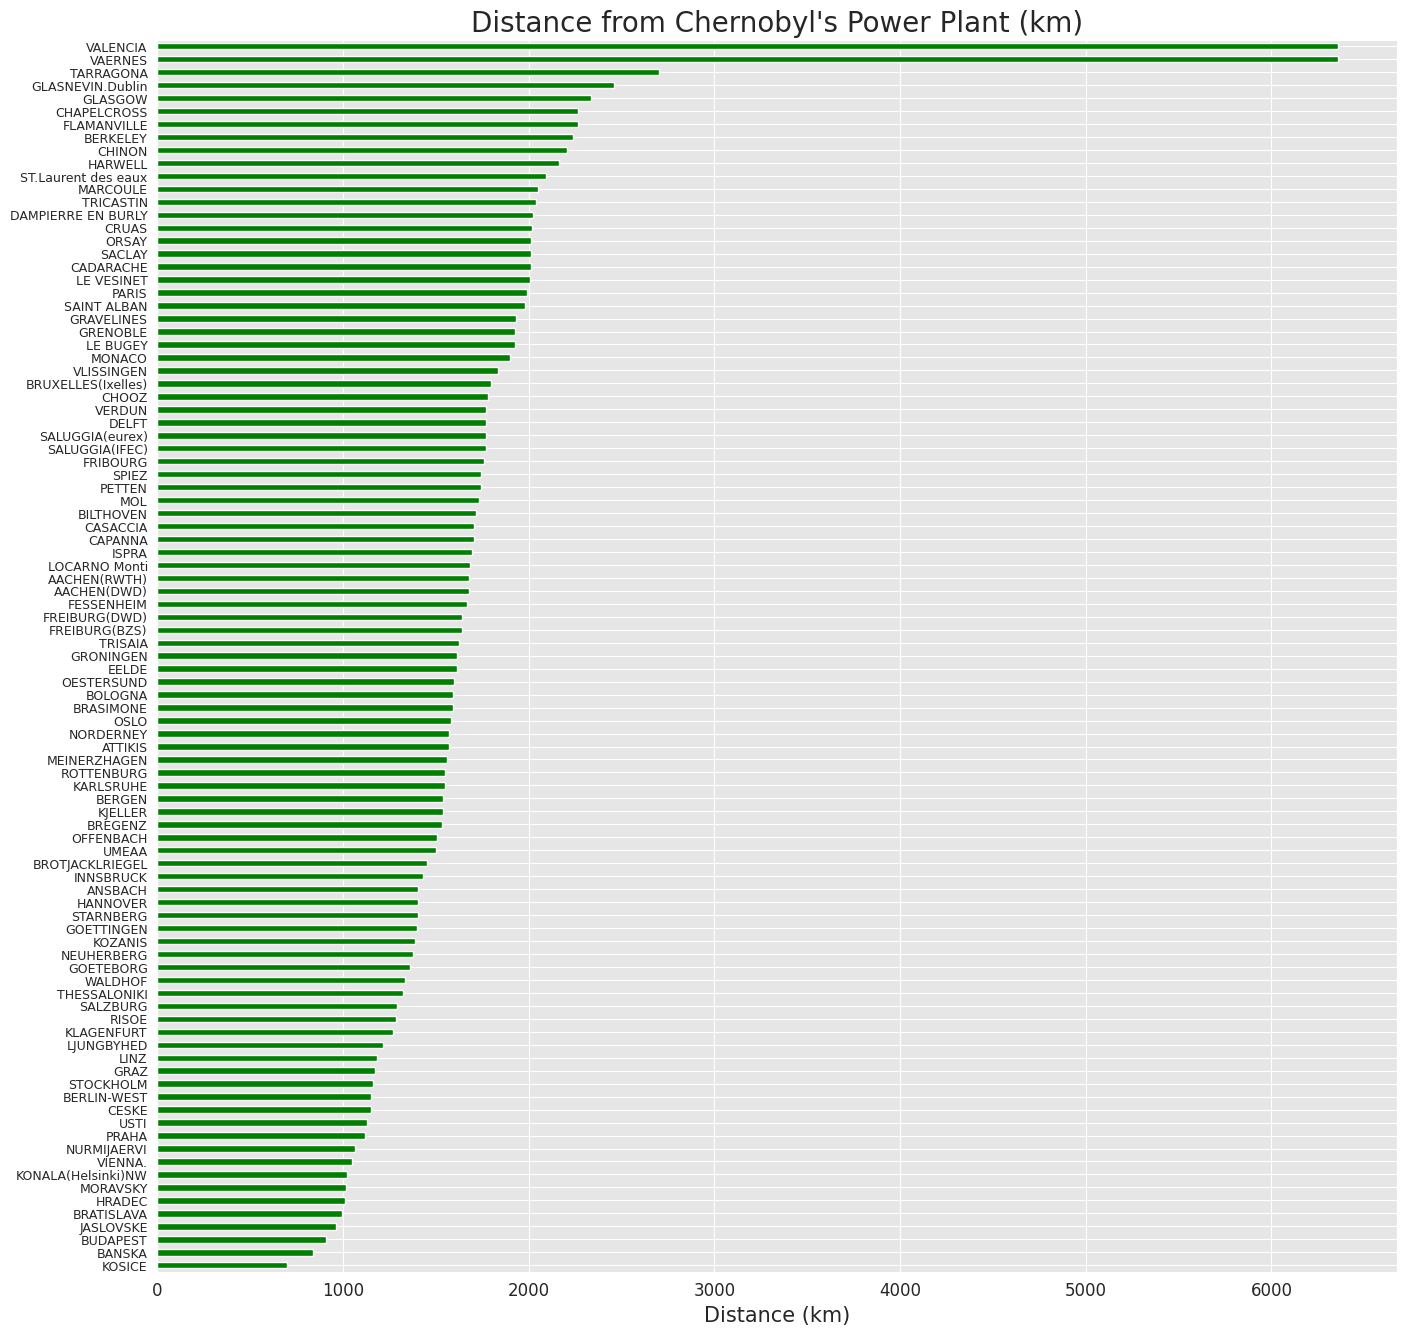

In [ ]:
ax1 = dist_df.iloc[0:95].plot(kind='barh', color='green', figsize=(16,16), fontsize='9')
ax1.set_title('Distance from Chernobyl\'s Power Plant (km)',fontsize=20);
plt.xticks(fontsize=12)
plt.xlabel('Distance (km)', fontsize='15')
plt.ylabel('', fontsize='0')
plt.show()

In [ ]:
# creating new df to calculate total activity / distance
dist_all_df = (early_df.groupby('locality')[['iodine131', 'caesium134', 'caesium137']].mean()) # Selecting only numeric columns
# fixing wrong coordinate values for VALENCIA and VAERNES (reported values were zeros).
dist_all_df = dist_all_df.reset_index()
dist_all_df.at[90, 'latitude'] = '39.5'
dist_all_df.at[90, 'longitude'] = '-0.4'
dist_all_df.at[89, 'latitude'] = '63.5'
dist_all_df.at[89, 'longitude'] = '10.9'

In [ ]:
# creating new dataframe to calculate the distances
dist_all_df = dist_all_df.set_index('locality')
dist_all_df['dist_km'] = coord_df['dist_km']
dist_all_df['total_bq'] = dist_all_df['iodine131'] + dist_all_df['caesium134'] + dist_all_df['caesium137']
dist_all_df['bq_per_dist'] = dist_all_df['total_bq'] / dist_all_df['dist_km']
dist_all_df = dist_all_df.sort_values('bq_per_dist')

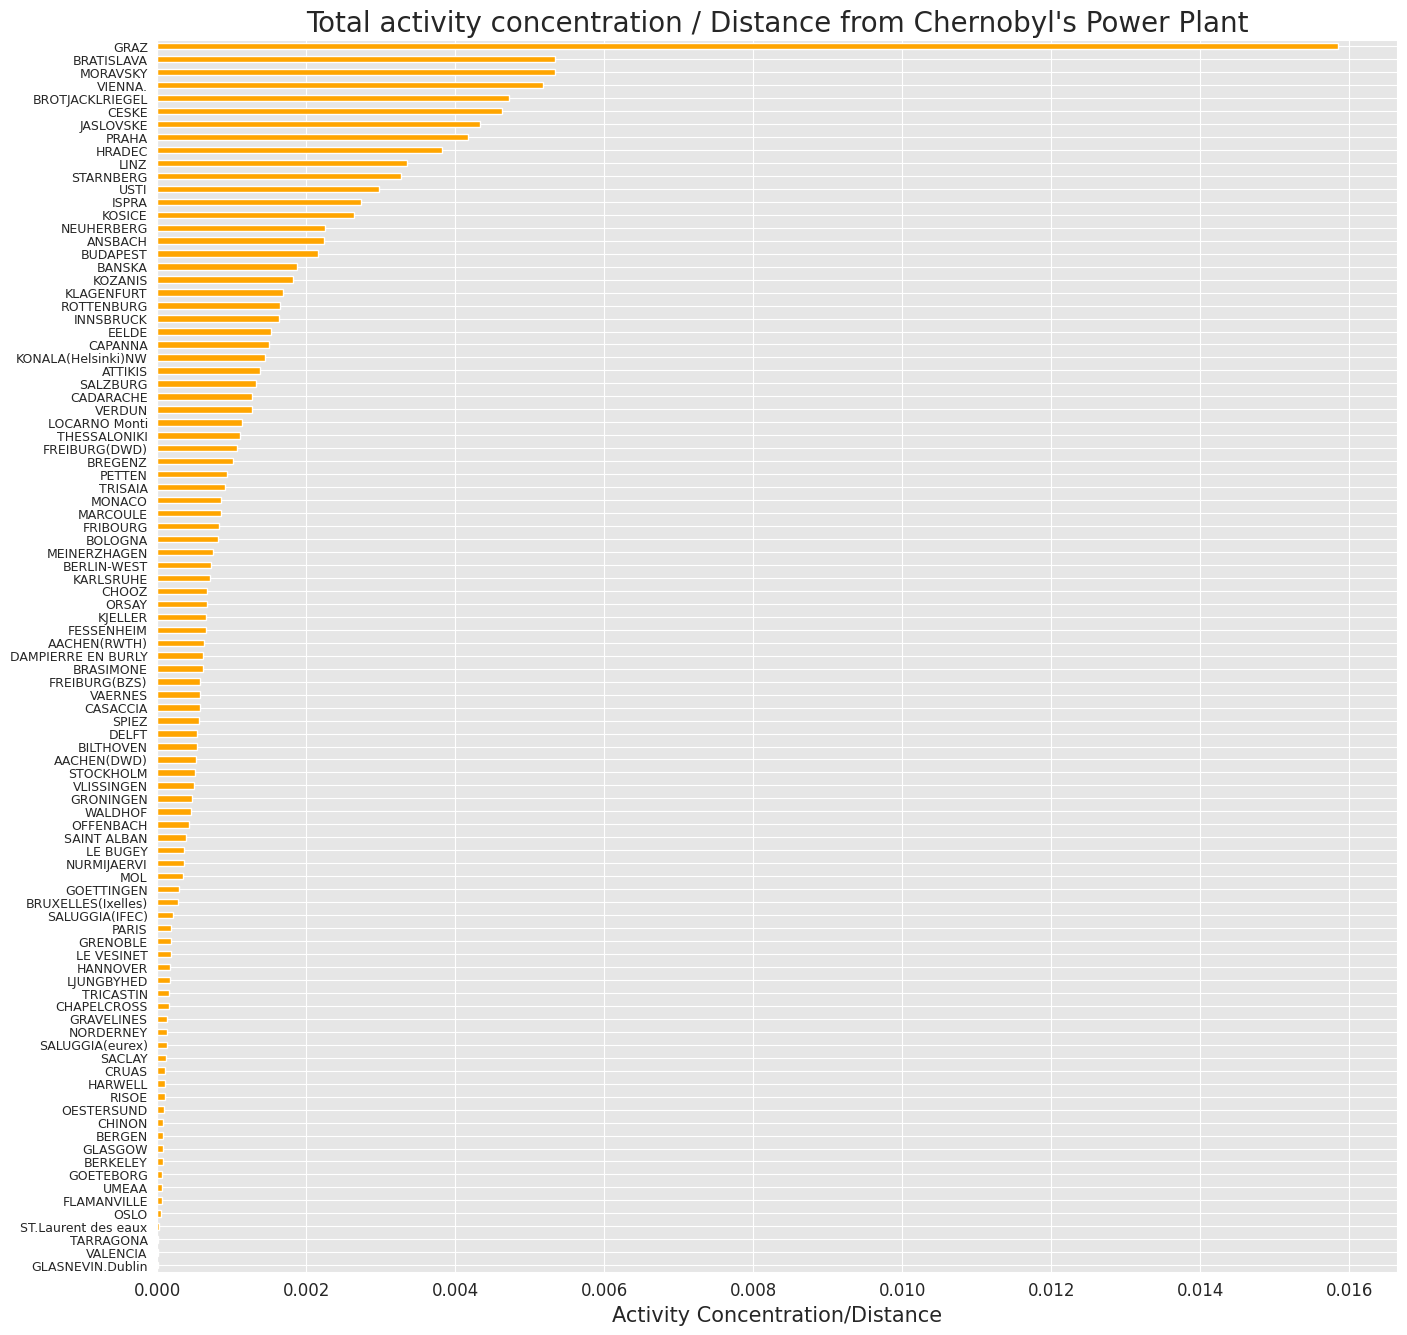

In [ ]:
# generating a horizontal bar plot
ax1 = dist_all_df['bq_per_dist'].plot(kind='barh', color="orange", figsize=(16,16), fontsize='9')
ax1.set_title('Total activity concentration / Distance from Chernobyl\'s Power Plant',fontsize=20);
plt.xticks(fontsize='12')
plt.xlabel('Activity Concentration/Distance', fontsize='15')
plt.ylabel('', fontsize='0')
plt.show()

In [ ]:
# creating new dataframe to analyze the change in time
time_df = early_df
time_df = time_df.groupby('date').sum()
time_df = time_df.reset_index(drop=False)
time_df = time_df.drop(columns=['country_code','longitude','latitude'])
time_df = time_df.rename(columns={'iodine131': 'I-131', 'caesium134': 'Cs-134', 'caesium137': 'Cs-137'})

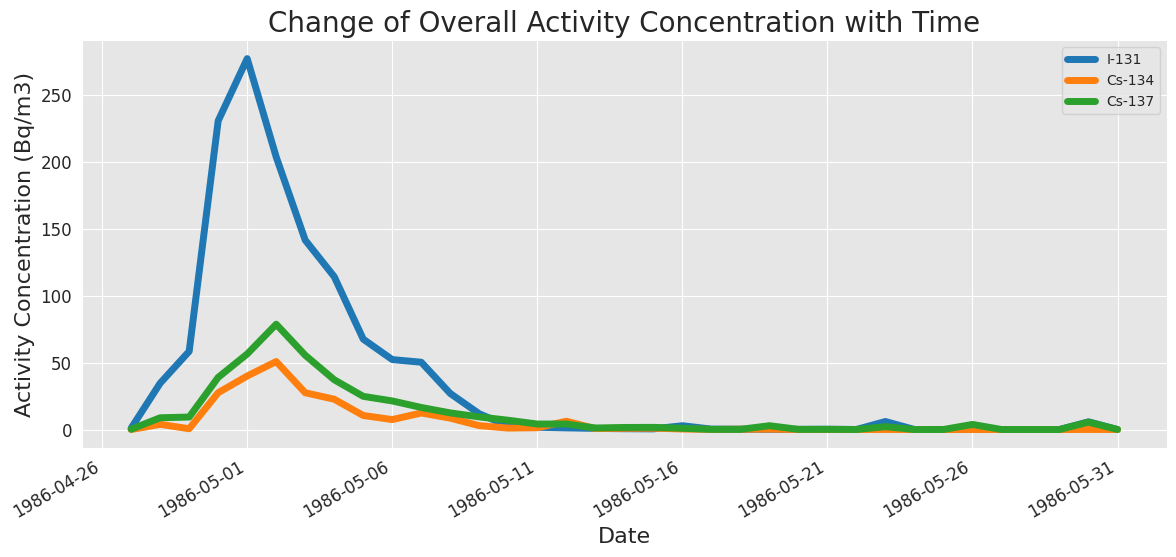

In [ ]:
# generating line plot
import matplotlib.dates as mdates # importing the mdates module
x = time_df['date']
y1 = time_df['I-131']
y2 = time_df['Cs-134']
y3 = time_df['Cs-137']
plt.figure(figsize=(14,6))
# changing date columns to plot date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
# plotting each isotope
plt.plot(x,y1, linewidth=5)
plt.plot(x,y2, linewidth=5)
plt.plot(x,y3, linewidth=5)
# plot settings
plt.gca().legend(('I-131','Cs-134','Cs-137'))
plt.ylabel('Activity Concentration (Bq/m3)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Change of Overall Activity Concentration with Time', fontsize=20)
# show plot
plt.show()

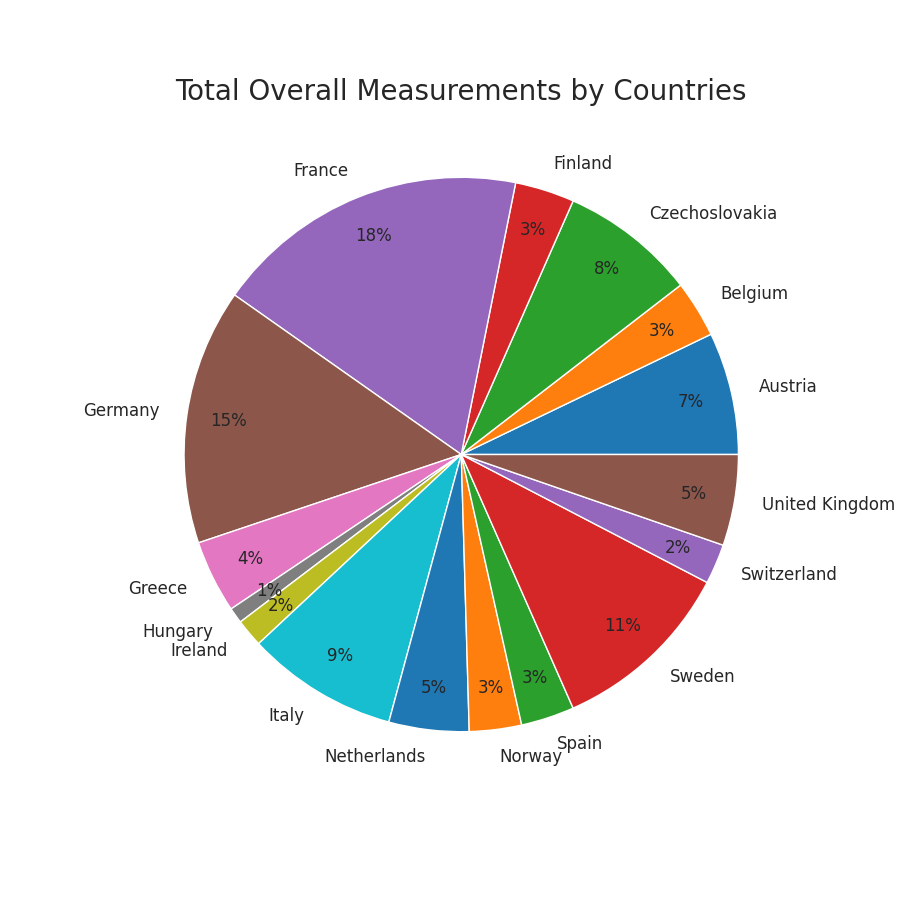

In [ ]:
# displaying image from saved files
from IPython.display import Image # Importing the Image class
Image(filename='piechart.png', width=600)

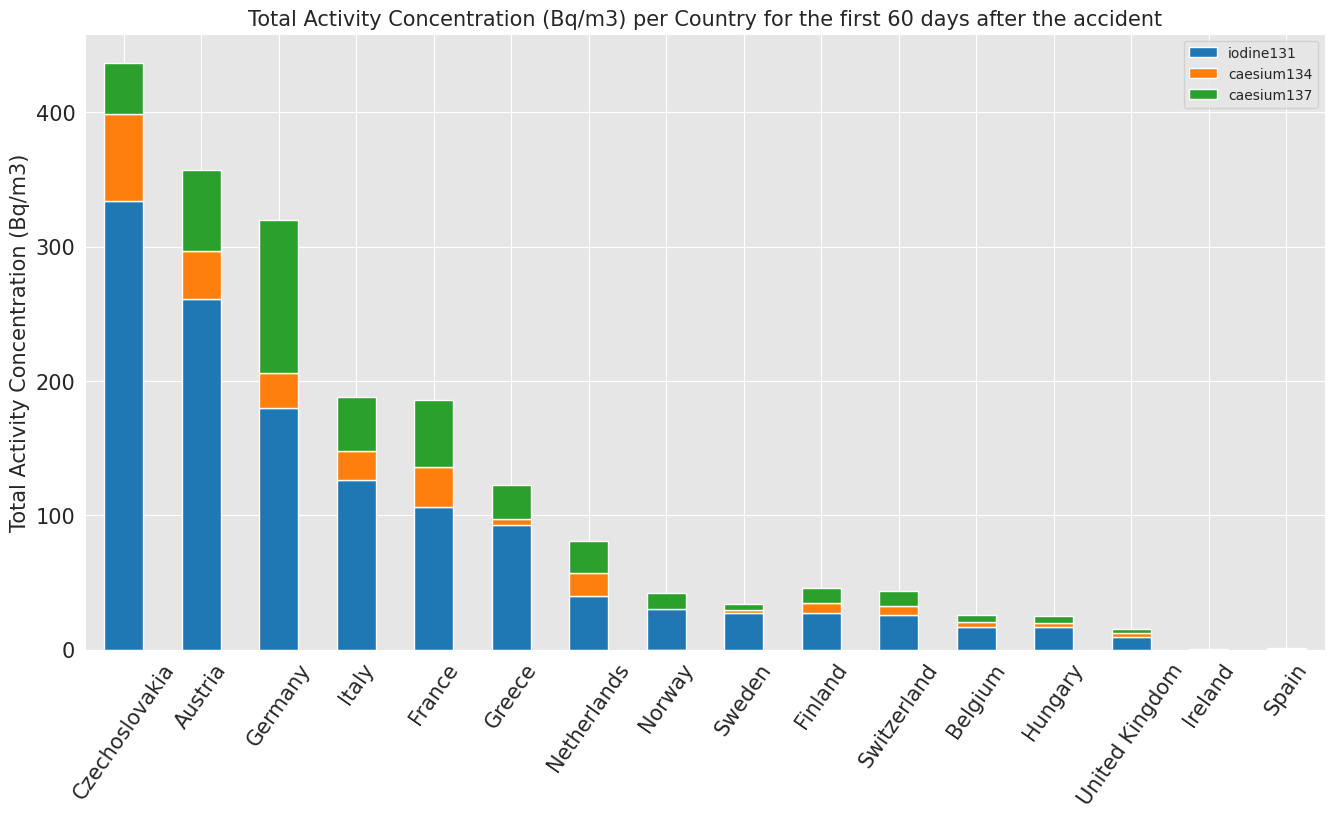

In [ ]:
# displaying image from saved files
Image(filename='countries.png', width=600)

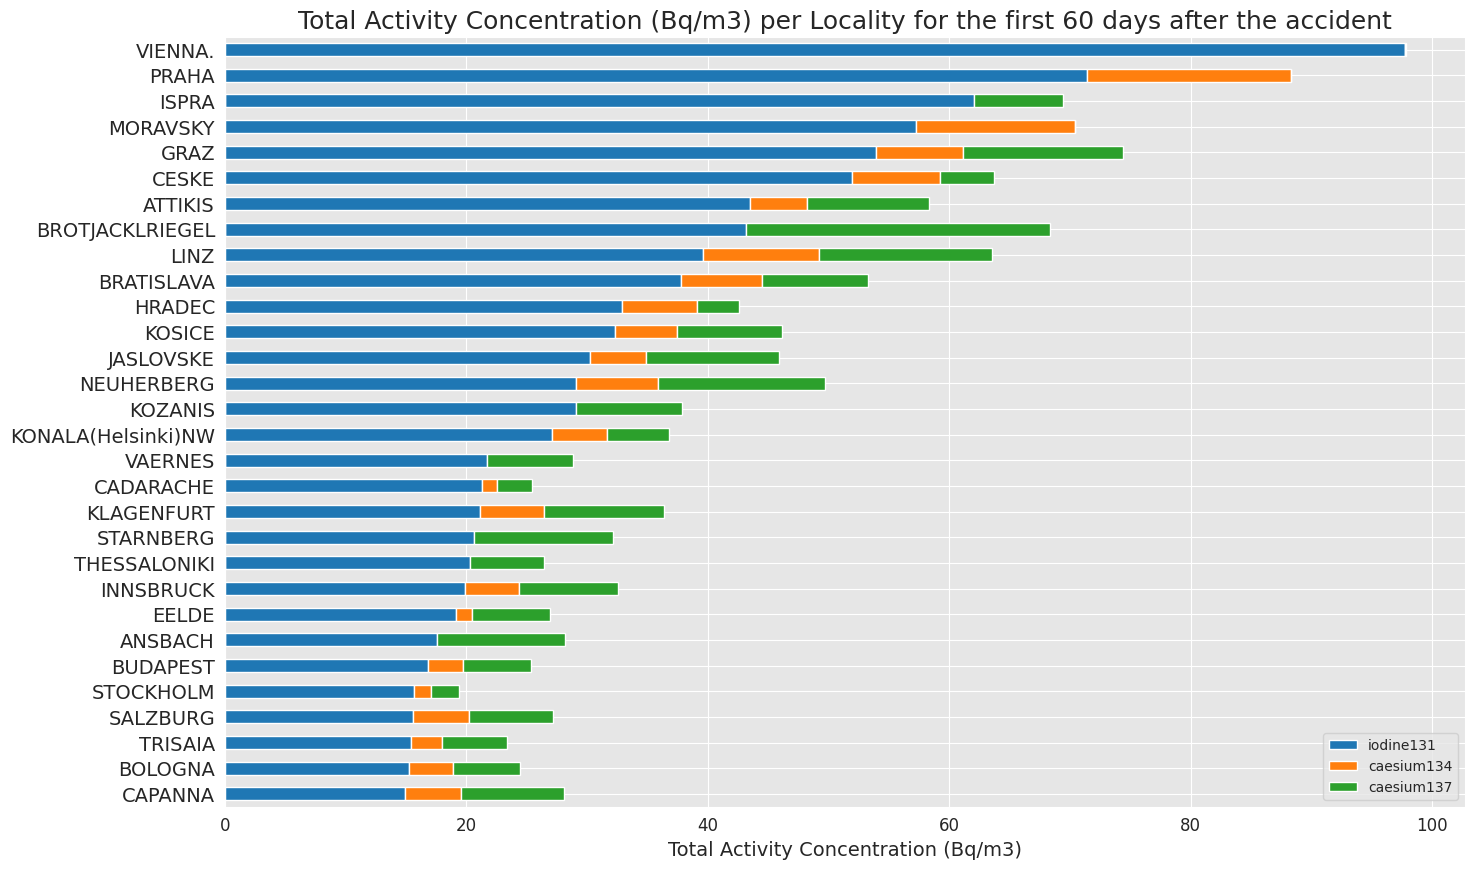

In [ ]:
# displaying image from saved files
Image(filename='localities.png', width=600)

In [ ]:
# creating new dataframe to generate map
map_df = dist_all_df.reset_index()
# fixing very wrong coordinate values for VALENCIA and VAERNES (reported lat/long values were zeros).
map_df.at[1, 'latitude'] = '39.5'
map_df.at[1, 'longitude'] = '-0.4'
map_df.at[44, 'latitude'] = '63.5'
map_df.at[44, 'longitude'] = '10.9'

In [ ]:
!pip install ipyleaflet --upgrade
from ipyleaflet import Map, Marker, MarkerCluster, basemaps, basemap_to_tiles, TileLayer, ScaleControl, FullScreenControl, Icon, Popup
from ipywidgets import HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.1 MB/s eta 0:00:00


In [ ]:
# creating list to setup the coordinates for each location marker on the map
longitudes = map_df['longitude'].values.tolist()
latitudes = map_df['latitude'].values.tolist()
markers = []
for index, row in map_df.iterrows():
    locality = row[0]
    lat = row[3]
    lon = row[2]
    markers.append(Marker(location=(lat, lon), riseonrover=True, draggable=False, title=locality))
m = Map(basemap=basemaps.Esri.WorldTopoMap, center=(np.mean(lat), np.mean(lon)), zoom=3)
marker_cluster = MarkerCluster(markers=markers)
m.add_layer(marker_cluster);
# adding scale reference and fullscreen control to the map
m.add_control(ScaleControl(position='topright'))
m.add_control(FullScreenControl())
# creating an icon to locate chernobyl's power plant
icon = Icon(icon_url='https://e7.pngegg.com/pngimages/823/668/png-clipart-radioactive-decay-ionizing-radiation-trefoil-hazard-symbol-symbol-miscellaneous-sign.png', icon_size=[35, 25], icon_anchor=[-20,10])
cherno_marker = Marker(location=(51.4, 30.1), draggable=False, title='Chernobyl Power Plant', icon=icon);
m.add_layer(cherno_marker);
# creating a popup message
message1 = HTML()
message1.value = "<center>View in <b>Fullscreen</b> for <br>a better experience!</center>"
# popup with a given location on the map:
popup = Popup(location=(57.5, -30),child=message1,close_button=True,auto_close=False,close_on_escape_key=False)
m.add_layer(popup)
# plot map
m

<ipython-input-79-5ec00757c55c>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  locality = row[0]
<ipython-input-79-5ec00757c55c>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = row[3]
<ipython-input-79-5ec00757c55c>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon = row[2]


Map(center=[np.float64(3.32445), np.float64(1.7999575)], controls=(ZoomControl(options=['position', 'zoom_in_t…

In [ ]:
!pip install folium
import folium
from folium.plugins import MarkerCluster

In [ ]:
# generating map using Folium
m = folium.Map(location=[np.mean(lat), np.mean(lon)],tiles='Cartodb Positron',zoom_start=3, control_scale = True)
# creating markers for each locality
marker_cluster = MarkerCluster(name='Reported Localities',overlay=True,control=False,icon_create_function=None)
longitudes = map_df['longitude'].values.tolist()
latitudes = map_df['latitude'].values.tolist()
for index, row in map_df.iterrows():
    locality = row[0]
    lat = row[3]
    lon = row[2]
    location = lat, lon
    marker = folium.Marker(location=location, tooltip=locality)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m)
# creating an icon to locate chernobyl's power plant
icon = folium.features.CustomIcon('https://e7.pngegg.com/pngimages/823/668/png-clipart-radioactive-decay-ionizing-radiation-trefoil-hazard-symbol-symbol-miscellaneous-sign.png', icon_size=(30,20))
folium.Marker([51.4, 30.1],popup=None,icon=icon,tooltip='Chernobyl Power Plant').add_to(m)
folium.plugins.Fullscreen(position='topleft', title='Full Screen', title_cancel='Exit Full Screen', force_separate_button=False).add_to(m)
# display map
m

<ipython-input-82-29ba5087c9f0>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  locality = row[0]
<ipython-input-82-29ba5087c9f0>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = row[3]
<ipython-input-82-29ba5087c9f0>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon = row[2]


In [ ]:
# creating new dataframe to generate a heatmap
heatmap_df = map_df[['latitude', 'longitude', 'total_bq']].copy(deep=False)
# multiplying column to increase intensity on the heatmap for better visibility
heatmap_df['total_bq'] = (heatmap_df['total_bq']*1000)

In [ ]:
!pip install ipyleaflet --upgrade
from ipyleaflet import Map, Marker, MarkerCluster, basemaps, basemap_to_tiles, TileLayer, ScaleControl, FullScreenControl, Icon, Popup, Heatmap # Importing Heatmap
from ipywidgets import HTML

In [ ]:
!pip install --upgrade ipyleaflet

In [ ]:
import folium
from folium import plugins

# Ensure correct data types for latitude, longitude, and intensity
heatmap_df['latitude'] = heatmap_df['latitude'].astype(float)
heatmap_df['longitude'] = heatmap_df['longitude'].astype(float)
heatmap_df['total_bq'] = heatmap_df['total_bq'].astype(float)

# Drop rows with NaN values in latitude or longitude
heatmap_df = heatmap_df.dropna(subset=['latitude', 'longitude'])

# Create a Folium map centered around the data
map_center = [heatmap_df['latitude'].mean(), heatmap_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=3)

# Create the heatmap layer
# Updated: Changed gradient keys to strings
plugins.HeatMap(
    data=heatmap_df[['latitude', 'longitude', 'total_bq']].values.tolist(),
    radius=15,  # Adjust radius as needed
    blur=35,   # Adjust blur as needed
    gradient={'0.0': 'navy', '0.2': 'blue', '0.3': 'cyan', '0.4': 'yellow', '0.7': 'red', '0.9': 'firebrick', '1.0': 'darkred'} # changed keys from float to strings
).add_to(m)

# Add Chernobyl marker (using the same icon URL)
icon_url = 'https://e7.pngegg.com/pngimages/823/668/png-clipart-radioactive-decay-ionizing-radiation-trefoil-hazard-symbol-symbol-miscellaneous-sign.png'
chernobyl_icon = folium.features.CustomIcon(icon_url, icon_size=(35, 25))
folium.Marker([51.4, 30.1], icon=chernobyl_icon, tooltip='Chernobyl Power Plant').add_to(m)

# Display the map using IPython.display
from IPython.display import display
display(m)

In [ ]:
import folium
from folium import plugins

# Ensure correct data types for latitude, longitude, and intensity
heatmap_df['latitude'] = heatmap_df['latitude'].astype(float)
heatmap_df['longitude'] = heatmap_df['longitude'].astype(float)
heatmap_df['total_bq'] = heatmap_df['total_bq'].astype(float)

# Drop rows with NaN values in latitude or longitude
heatmap_df = heatmap_df.dropna(subset=['latitude', 'longitude'])

# Create a Folium map centered around the data
map_center = [heatmap_df['latitude'].mean(), heatmap_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=3)

# Create the heatmap layer
# Updated: Changed gradient keys to strings
plugins.HeatMap(
    data=heatmap_df[['latitude', 'longitude', 'total_bq']].values.tolist(),
    radius=15,  # Adjust radius as needed
    blur=35,   # Adjust blur as needed
    gradient={'0': 'navy', '0.2': 'blue', '0.3': 'cyan', '0.4': 'yellow', '0.7': 'red', '0.9': 'firebrick', '1': 'darkred'}  # changed keys from float to strings
).add_to(m)

# Add Chernobyl marker (using the same icon URL)
icon_url = 'https://e7.pngegg.com/pngimages/823/668/png-clipart-radioactive-decay-ionizing-radiation-trefoil-hazard-symbol-symbol-miscellaneous-sign.png'
chernobyl_icon = folium.features.CustomIcon(icon_url, icon_size=(35, 25))
folium.Marker([51.4, 30.1], icon=chernobyl_icon, tooltip='Chernobyl Power Plant').add_to(m)

# Display the map using IPython.display
from IPython.display import display
display(m)